In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
import wrangle_zillow as w
import explore as e
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
df = w.get_zillow_data()

In [3]:
def fips_labels(x):
    if x['fips'] == 6037:
        return 'Los Angeles County'
    elif x['fips'] == 6059:
        return 'Orange County'
    elif x['fips'] == 6111:
        return 'Ventura County'

In [4]:
# Creating a county column
df['county'] = df.apply(lambda x: fips_labels(x), axis=1)
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,county
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,Orange County
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,Ventura County
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,Orange County
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,Los Angeles County
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN,Los Angeles County


In [5]:
df= w.single_unit_properties(df)

In [6]:
df=w.handle_missing_values(df, prop_required_column = .60, prop_required_row = .60)

In [7]:
train, validate, test =w.impute_missing_values(df)

In [8]:
train, validate, test = w.impute_missing_values_1(train, validate, test)

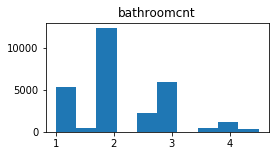

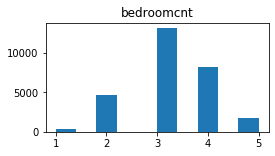

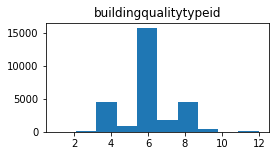

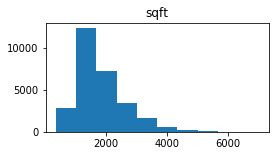

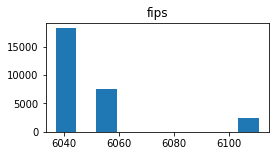

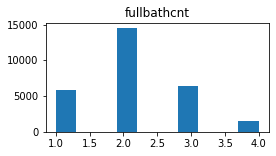

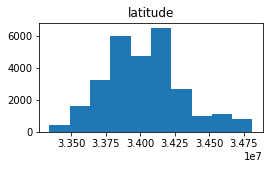

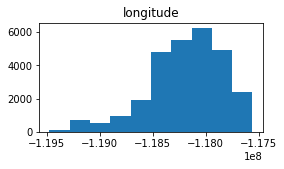

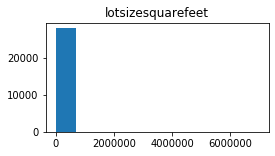

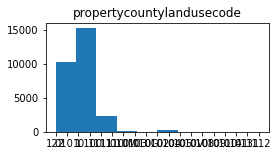

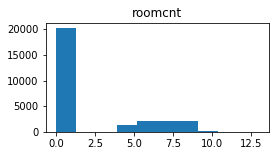

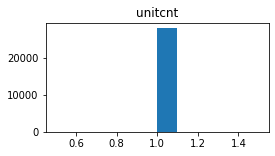

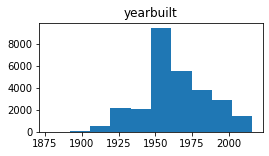

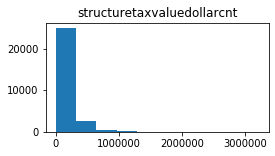

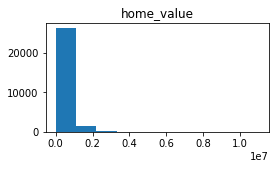

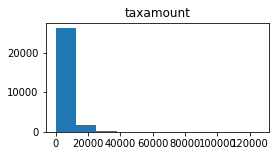

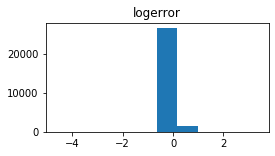

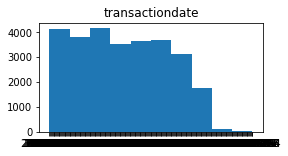

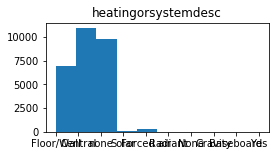

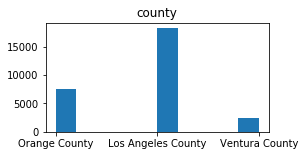

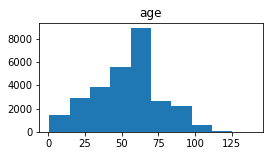

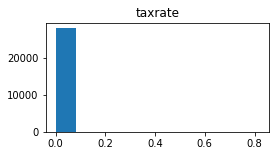

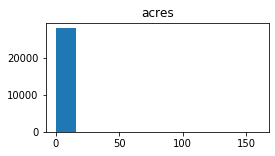

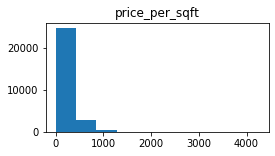

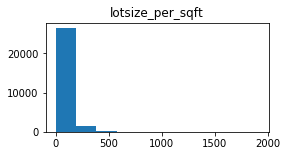

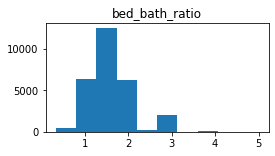

In [9]:
 for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

## Features normally distributed
    - bedroomcnt
    - building quality type id
    - fullbathcnt
    - latitude
    - year built
    - age
    - bed bath ratio
    
## Features skewed right
    - sqft
    
## Features skewed left
    - longitude
    

## Is there a relationship between price_per_sqft and logerror?

In [10]:
train.head().T

,1616,33322,44530,32756,67546
bathroomcnt,1,3,4.5,3,3
bedroomcnt,2,4,5,4,2
buildingqualitytypeid,6,7,6,6,7
sqft,906,2548,4733,2776,2083
fips,6059,6037,6059,6059,6037
fullbathcnt,1,3,4,3,3
latitude,3.38536e+07,3.44671e+07,3.35811e+07,3.37002e+07,3.40441e+07
longitude,-1.18013e+08,-1.18203e+08,-1.17691e+08,-1.17726e+08,-1.1839e+08
lotsizesquarefeet,4536,107586,29600,6933,6379
propertycountylandusecode,122,0101,122,1,0100


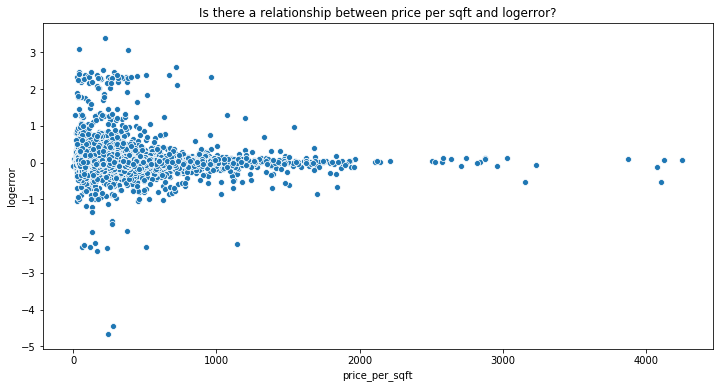

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train, x='price_per_sqft', y='logerror')
plt.title('Is there a relationship between price per sqft and logerror?')
plt.show()

- Going to bin price_per_sqft. May want to get rid of the price per sqft over 2K??

In [12]:
train['binned_price_per_sqft'] = pd.cut(train.price_per_sqft, [0,1000,2000,5000] , labels=["small", "medium", "large"])
validate['binned_price_per_sqft'] = pd.cut(validate.price_per_sqft, [0,1000,2000,5000] , labels=["small", "medium", "large"])
test['binned_price_per_sqft'] = pd.cut(test.price_per_sqft, [0,1000,2000,5000] , labels=["small", "medium", "large"])

In [13]:
train.binned_price_per_sqft.value_counts(dropna=False)

small     27845
medium      264
large        24
Name: binned_price_per_sqft, dtype: int64

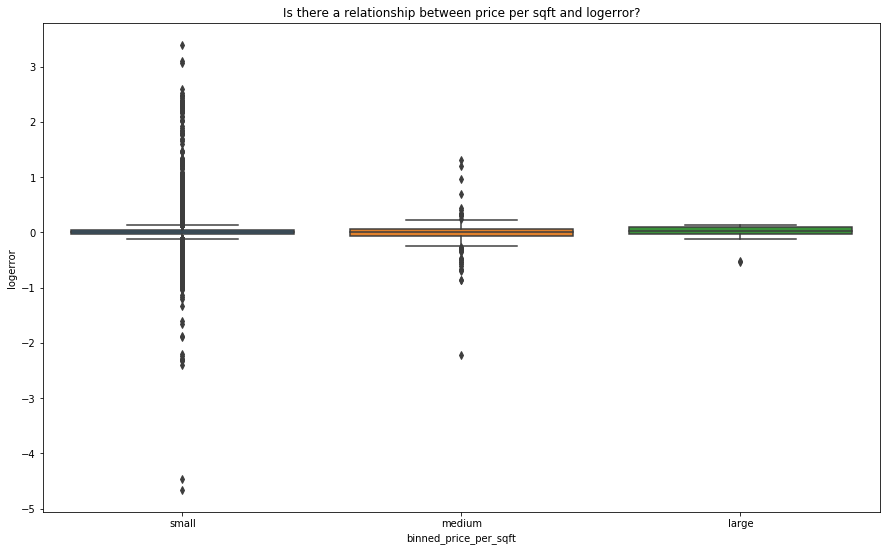

In [14]:
plt.figure(figsize=(15,9))
sns.boxplot(x= 'binned_price_per_sqft', y = 'logerror', data = train)
plt.title('Is there a relationship between price per sqft and logerror?')
plt.show()

## Hard to see if there is a correlation here. Going to run a statistical test (ANOVA) to see if there is a significance in the means of price per sqft and log error.

In [15]:
small_price_per_sqft_ratio = train[train.binned_price_per_sqft == 'small'].price_per_sqft
medium_price_per_sqft_ratio = train[train.binned_price_per_sqft == 'medium'].price_per_sqft
large_price_per_sqft_ratio = train[train.binned_price_per_sqft == 'large'].price_per_sqft

- Ho: Means of binned price_per_sqft_ratio small, medium, large are equal
- Ha: Means of binned price_per_sqft_ratio, medium, large are not equal
- alpha = .05

In [16]:
print(small_price_per_sqft_ratio.var())
print(medium_price_per_sqft_ratio.var())
print(large_price_per_sqft_ratio.var())

25797.376400826815
66359.22062652641
441774.5297190322


In [17]:
f, p = stats.f_oneway(small_price_per_sqft_ratio, medium_price_per_sqft_ratio, large_price_per_sqft_ratio)
f, p

(8553.03763805571, 0.0)

- We reject the null Hypothesis. p-value is less than alpha. The means of binned price per sqft ratio are not equal.

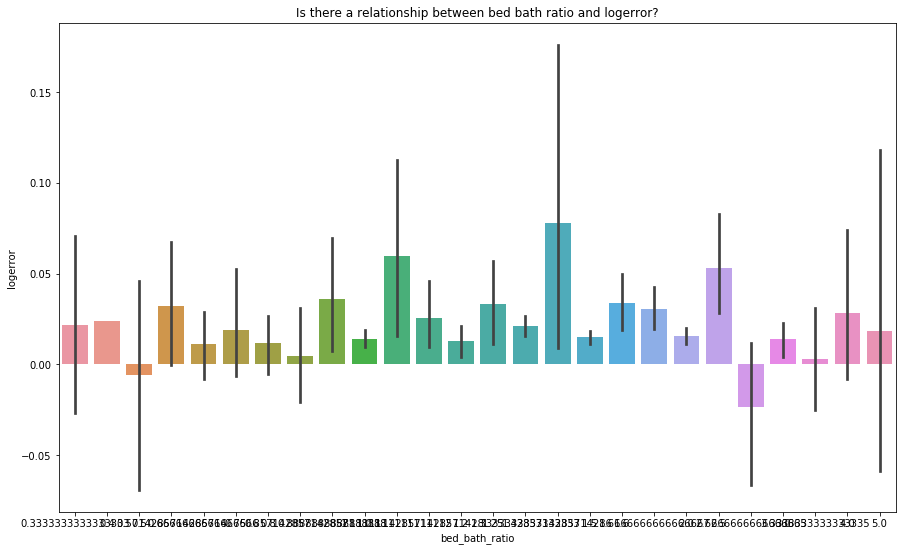

In [18]:
plt.figure(figsize=(15,9))
sns.barplot(x= 'bed_bath_ratio', y = 'logerror', data = train)
plt.title('Is there a relationship between bed bath ratio and logerror?')
plt.show()

In [19]:
train['binned_bed_bath_ratio'] = pd.qcut(train.bed_bath_ratio, 3, labels=["small", "medium", "large"])
validate['binned_bed_bath_ratio'] = pd.qcut(train.bed_bath_ratio, 3, labels=["small", "medium", "large"])
test['binned_bed_bath_ratio'] = pd.qcut(train.bed_bath_ratio, 3, labels=["small", "medium", "large"])

In [20]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,heatingorsystemdesc,county,age,taxrate,acres,price_per_sqft,lotsize_per_sqft,bed_bath_ratio,binned_price_per_sqft,binned_bed_bath_ratio
1616,1.0,2.0,6.0,906.0,6059.0,1.0,33853594.0,-118013182.0,4536.0,122,...,Floor/Wall,Orange County,57.0,0.011973,0.104132,309.910596,61.900132,2.000000,small,large
33322,3.0,4.0,7.0,2548.0,6037.0,3.0,34467094.0,-118202886.0,107586.0,0101,...,Central,Los Angeles County,35.0,0.011922,2.469835,166.306122,3.938691,1.333333,small,small
44530,4.5,5.0,6.0,4733.0,6059.0,4.0,33581133.0,-117690741.0,29600.0,122,...,none,Orange County,10.0,0.010278,0.679522,432.012043,69.078142,1.111111,small,small
32756,3.0,4.0,6.0,2776.0,6059.0,3.0,33700191.0,-117725630.0,6933.0,1,...,none,Orange County,3.0,0.016351,0.159160,392.491354,157.155056,1.333333,small,small
67546,3.0,2.0,7.0,2083.0,6037.0,3.0,34044109.0,-118390335.0,6379.0,0100,...,Central,Los Angeles County,70.0,0.012270,0.146442,364.217955,118.931807,0.666667,small,small


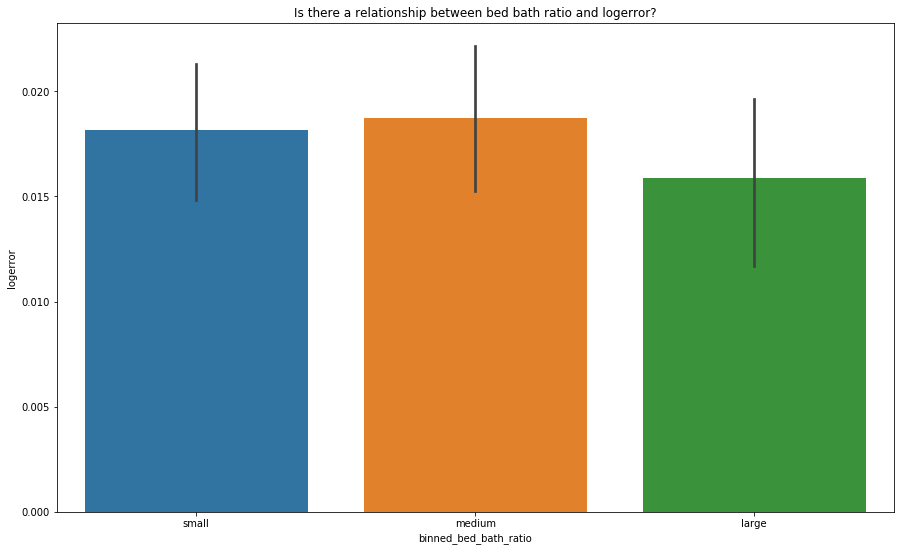

In [21]:
plt.figure(figsize=(15,9))
sns.barplot(x= 'binned_bed_bath_ratio', y = 'logerror', data = train)
plt.title('Is there a relationship between bed bath ratio and logerror?')
plt.show()

## Going to run a Annova Test to see if there is a significance in bed_bath_ratio to logerror

In [22]:
small_bed_bath_ratio = train[train.binned_bed_bath_ratio == 'small'].bed_bath_ratio
medium_bed_bath_ratio = train[train.binned_bed_bath_ratio == 'medium'].bed_bath_ratio
large_bed_bath_ratio = train[train.binned_bed_bath_ratio == 'large'].bed_bath_ratio

 - Ho: Means of binned bed_bath_ratio small, medium, large are equal
 - Ha: Means of binned bed_bath_ratio small, medium, large are not equal
 - alpha = .05

In [23]:
print(small_bed_bath_ratio.var())
print(medium_bed_bath_ratio.var())
print(large_bed_bath_ratio.var())

0.033051008814788396
0.0029452921387648568
0.24418842500563911


In [24]:
f, p = stats.f_oneway(small_bed_bath_ratio, medium_bed_bath_ratio, large_bed_bath_ratio)
f, p

(36437.66493599394, 0.0)

- We reject the null Hypothesis. p-value is less than alpha.  The means of binned bed bath ratio are not equal.

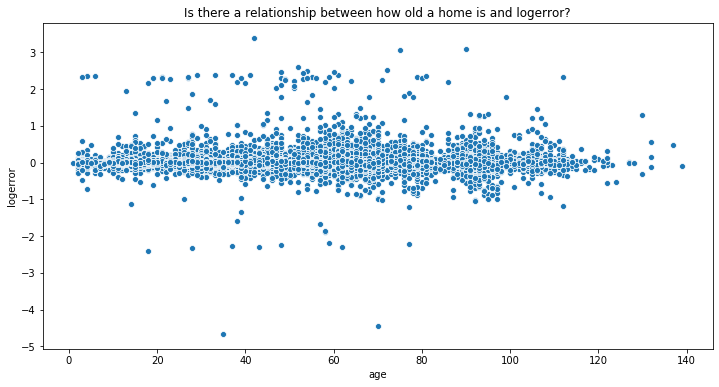

In [25]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=train, x='age', y='logerror')
plt.title('Is there a relationship between how old a home is and logerror?')
plt.show()


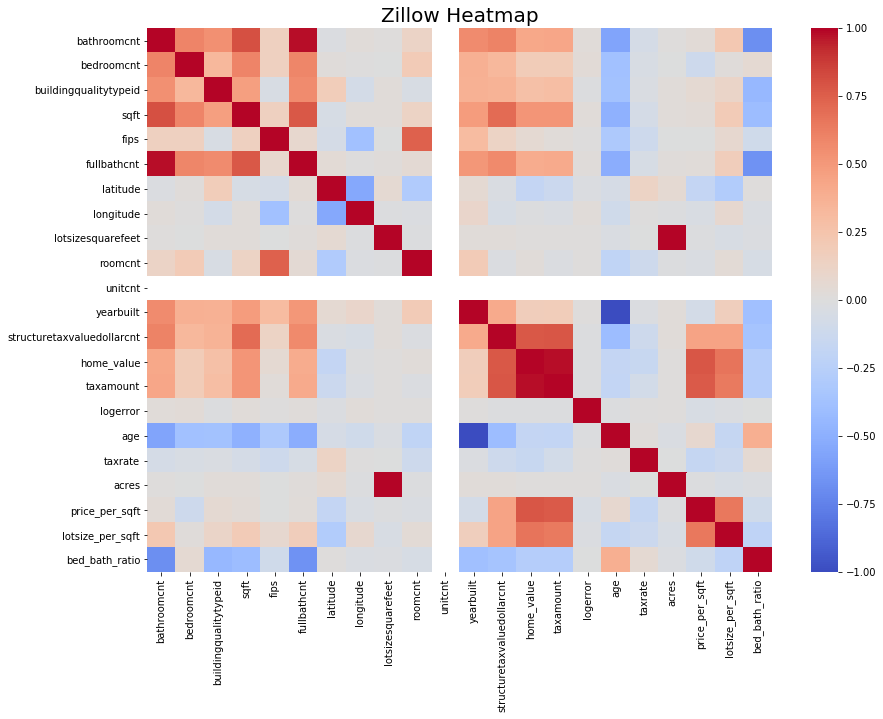

In [26]:
# Heat map showing how the variables correlate to each other
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),
            vmin = -1, 
            cmap='coolwarm',
           annot=False).set_title("Zillow Heatmap", fontsize=20);

- Looking at the bottom 3 variables. They seem to have a correlation. Age, bathroomcnt, bedroomcnt, sqft, fullbath,yearbuilt, structure tax value count and building quality type id looks like they have some correlation

In [27]:
train.corr()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,...,structuretaxvaluedollarcnt,home_value,taxamount,logerror,age,taxrate,acres,price_per_sqft,lotsize_per_sqft,bed_bath_ratio
bathroomcnt,1.000000,0.599332,0.543201,0.807946,0.154347,0.978971,-0.016331,0.029158,0.015594,0.119313,...,0.604623,0.425775,0.431182,0.023609,-0.562665,-0.064004,0.015594,0.035496,0.225420,-0.682809
bedroomcnt,0.599332,1.000000,0.329855,0.599616,0.154581,0.589462,0.018889,0.007504,-0.002383,0.196376,...,0.335254,0.190629,0.195118,0.031455,-0.380906,-0.040952,-0.002383,-0.113319,0.018396,0.061149
buildingqualitytypeid,0.543201,0.329855,1.000000,0.473765,-0.043583,0.565473,0.184546,-0.073117,0.030377,-0.046097,...,0.364279,0.277152,0.294188,-0.012662,-0.369413,-0.030227,0.030377,0.059915,0.110288,-0.444048
sqft,0.807946,0.599616,0.473765,1.000000,0.151637,0.777631,-0.046927,0.025888,0.029640,0.127964,...,0.710090,0.515796,0.518985,0.028839,-0.486019,-0.069366,0.029640,0.032310,0.202058,-0.410590
fips,0.154347,0.154581,-0.043583,0.151637,1.000000,0.081357,-0.065461,-0.381245,-0.007154,0.743087,...,0.125464,0.061153,0.025024,0.004583,-0.305765,-0.109609,-0.007154,-0.005193,0.070395,-0.097681
fullbathcnt,0.978971,0.589462,0.565473,0.777631,0.081357,1.000000,0.042867,0.000112,0.018100,0.053024,...,0.575977,0.403224,0.413329,0.020780,-0.510227,-0.049774,0.018100,0.028547,0.179162,-0.668172
latitude,-0.016331,0.018889,0.184546,-0.046927,-0.065461,0.042867,1.000000,-0.540240,0.055444,-0.289952,...,-0.030112,-0.176548,-0.130714,-0.021793,-0.056661,0.125231,0.055444,-0.174146,-0.285584,0.015361
longitude,0.029158,0.007504,-0.073117,0.025888,-0.381245,0.000112,-0.540240,1.000000,-0.013733,-0.020430,...,-0.053417,-0.013329,-0.024640,0.030431,-0.100845,0.005559,-0.013733,-0.038402,0.077910,-0.024365
lotsizesquarefeet,0.015594,-0.002383,0.030377,0.029640,-0.007154,0.018100,0.055444,-0.013733,1.000000,-0.011789,...,0.024579,0.008877,0.008118,0.012430,-0.030105,-0.002196,1.000000,-0.008904,-0.039122,-0.021688
roomcnt,0.119313,0.196376,-0.046097,0.127964,0.743087,0.053024,-0.289952,-0.020430,-0.011789,1.000000,...,-0.022069,0.024164,-0.023083,0.015011,-0.198811,-0.111146,-0.011789,-0.026727,0.043539,-0.052657


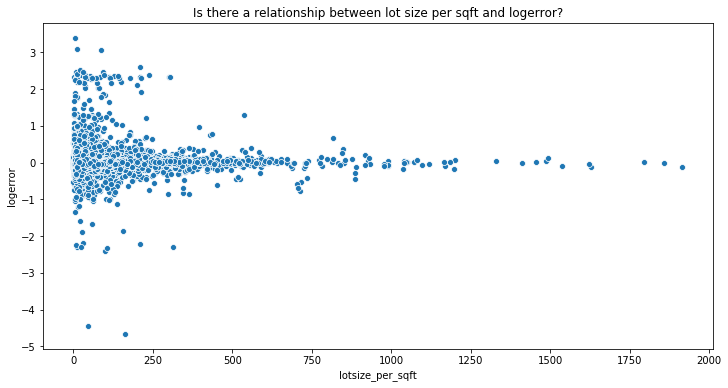

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train, x='lotsize_per_sqft', y='logerror')
plt.title('Is there a relationship between lot size per sqft and logerror?')
plt.show()

- There appears to be a lot of error on the differnt lot sized up to 300 or so before leveling off.

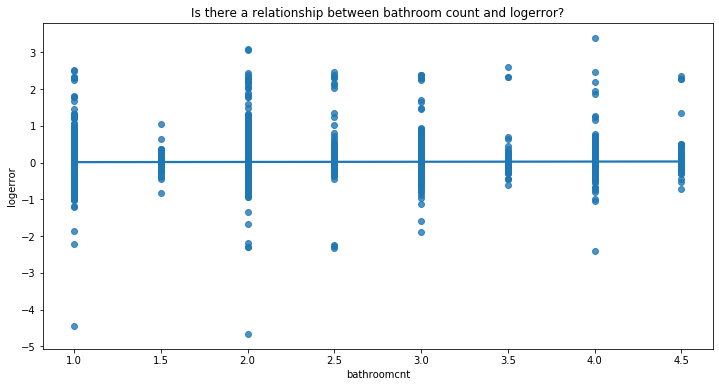

In [29]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x='bathroomcnt', y='logerror')
plt.title('Is there a relationship between bathroom count and logerror?')
plt.show()


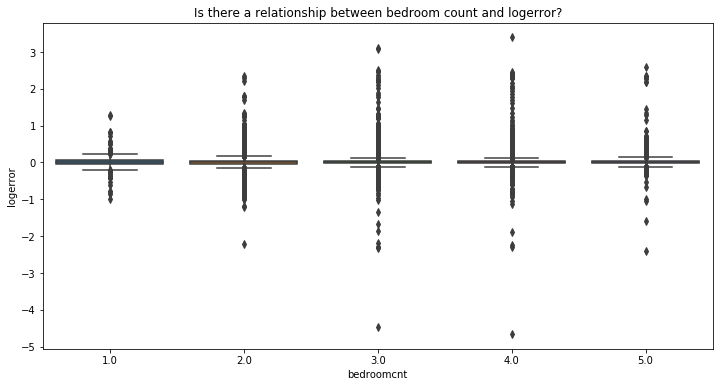

In [30]:
plt.figure(figsize = (12,6))
sns.boxplot(data=train, x='bedroomcnt', y='logerror')
plt.title('Is there a relationship between bedroom count and logerror?')
plt.show()


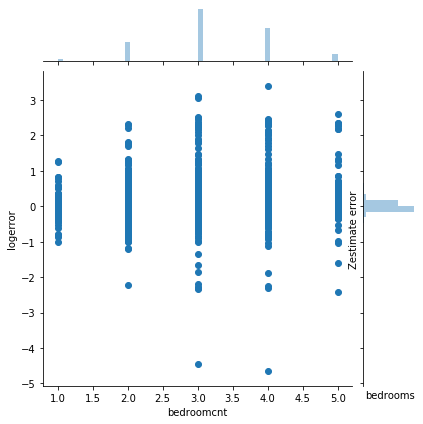

In [31]:
sns.jointplot(x="bedroomcnt", y="logerror", data=train)
plt.xlabel("bedrooms")
plt.ylabel("Zestimate error")
plt.show()

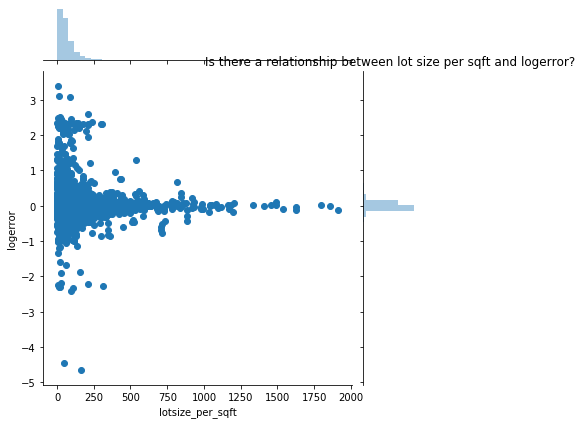

In [32]:
sns.jointplot(data=train, x='lotsize_per_sqft', y='logerror')
plt.title('Is there a relationship between lot size per sqft and logerror?')
plt.show()

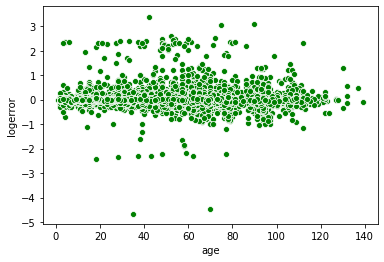

In [33]:
sns.scatterplot(x='age', y='logerror', 
                data=train, 
                color='green')

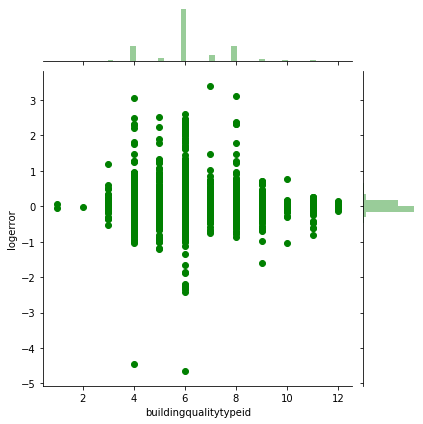

In [34]:
sns.jointplot(x='buildingqualitytypeid', y='logerror', 
                data=train, 
                color='green'
               )

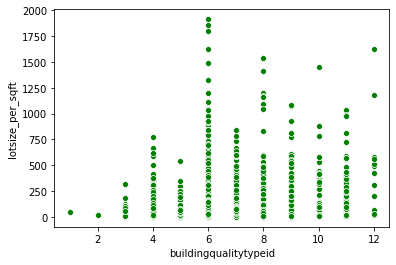

In [35]:
sns.scatterplot(x='buildingqualitytypeid', y='lotsize_per_sqft', 
                data=train, 
                color='green')

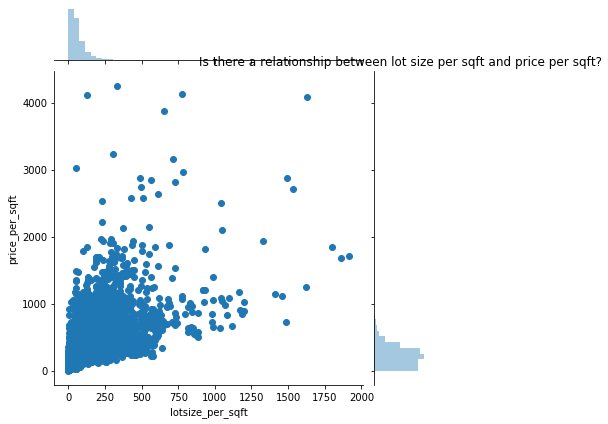

In [36]:
sns.jointplot(data=train, x='lotsize_per_sqft', y='price_per_sqft')
plt.title('Is there a relationship between lot size per sqft and price per sqft?')
plt.show()

In [37]:
train.head().T

,1616,33322,44530,32756,67546
bathroomcnt,1,3,4.5,3,3
bedroomcnt,2,4,5,4,2
buildingqualitytypeid,6,7,6,6,7
sqft,906,2548,4733,2776,2083
fips,6059,6037,6059,6059,6037
fullbathcnt,1,3,4,3,3
latitude,3.38536e+07,3.44671e+07,3.35811e+07,3.37002e+07,3.40441e+07
longitude,-1.18013e+08,-1.18203e+08,-1.17691e+08,-1.17726e+08,-1.1839e+08
lotsizesquarefeet,4536,107586,29600,6933,6379
propertycountylandusecode,122,0101,122,1,0100


- May look into this via hyp test

### Making my X_train, Y_train etc variables

In [38]:
 X_train, y_train, X_validate, y_validate, X_test, y_test = w.X_train_select(train, validate, test, target_var = 'logerror')

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28133 entries, 1616 to 32584
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   bathroomcnt                 28133 non-null  float64 
 1   bedroomcnt                  28133 non-null  float64 
 2   buildingqualitytypeid       28133 non-null  float64 
 3   sqft                        28133 non-null  float64 
 4   fips                        28133 non-null  float64 
 5   fullbathcnt                 28133 non-null  float64 
 6   latitude                    28133 non-null  float64 
 7   longitude                   28133 non-null  float64 
 8   lotsizesquarefeet           28133 non-null  float64 
 9   propertycountylandusecode   28133 non-null  object  
 10  roomcnt                     28133 non-null  float64 
 11  unitcnt                     28133 non-null  float64 
 12  yearbuilt                   28133 non-null  float64 
 13  structuretaxv

In [40]:
def rfe_ranker(train):
    '''
    Uses Recursive Feature Elimination (RFE) to rank the given features in order of their usefulness in
    predicting logerror with a linear regression model.
    '''
    # creating linear regression object
    lm = LinearRegression()

    # fitting linear regression model to features 
    lm.fit(train.drop(columns=['county','bathroomcnt','fullbathcnt','bedroomcnt','unitcnt','taxrate', 'logerror','propertycountylandusecode','heatingorsystemdesc', 'binned_price_per_sqft', 'binned_bed_bath_ratio', 'transactiondate']), train['logerror'])

    # creating recursive feature elimination object and specifying to rank 5 of the best features
    rfe = RFE(lm, 5)

    # using rfe object to transform features 
    x_rfe = rfe.fit_transform(train.drop(columns=['county','bathroomcnt','fullbathcnt','bedroomcnt','unitcnt','taxrate', 'logerror','propertycountylandusecode','heatingorsystemdesc', 'binned_price_per_sqft', 'binned_bed_bath_ratio','transactiondate']), train['logerror'])

    feature_mask = rfe.support_

    # creating train df for rfe object 
    rfe_train = train.drop(columns=['county','bathroomcnt','fullbathcnt','bedroomcnt','unitcnt','taxrate', 'logerror','propertycountylandusecode','heatingorsystemdesc', 'binned_price_per_sqft', 'binned_bed_bath_ratio', 'transactiondate'])

    # creating list of the top features per rfe
    rfe_features = rfe_train.loc[:,feature_mask].columns.tolist()

    # creating ranked list 
    feature_ranks = rfe.ranking_

    # creating list of feature names
    feature_names = rfe_train.columns.tolist()

    # create df that contains all features and their ranks
    rfe_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

    # return df sorted by rank
    return rfe_ranks_df.sort_values('Rank')

In [41]:
rfe_ranker(train)

,Feature,Rank
0,buildingqualitytypeid,1
6,roomcnt,1
7,yearbuilt,1
11,age,1
15,bed_bath_ratio,1
2,fips,2
13,price_per_sqft,3
1,sqft,4
14,lotsize_per_sqft,5
10,taxamount,6


### After editing my variables to rank I will look more into building quality type id, age, bed bath ratio, and price_per sqft

### Setting my scaler I want to use along with the variables I want to scale

In [42]:
scaler = StandardScaler()
columns_to_scale = train.drop(columns=['county',"logerror",'propertycountylandusecode','transactiondate','heatingorsystemdesc','binned_price_per_sqft','binned_bed_bath_ratio']).columns.tolist()
X_train_scaled, X_validate_scaled, X_test_scaled = w.add_scaled_columns(X_train, X_validate, X_test, scaler, columns_to_scale)

In [43]:
X_train_scaled

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,yearbuilt_scaled,structuretaxvaluedollarcnt_scaled,home_value_scaled,taxamount_scaled,age_scaled,taxrate_scaled,acres_scaled,price_per_sqft_scaled,lotsize_per_sqft_scaled,bed_bath_ratio_scaled
1616,1.0,2.0,6.0,906.0,6059.0,1.0,33853594.0,-118013182.0,4536.0,122,...,-0.122722,-0.804889,-0.398294,-0.440179,0.122722,-0.189102,-0.069464,0.271193,-0.114096,0.670994
33322,3.0,4.0,7.0,2548.0,6037.0,3.0,34467094.0,-118202886.0,107586.0,0101,...,0.852547,1.012244,-0.089560,-0.122922,-0.852547,-0.195544,1.126773,-0.424269,-0.785366,-0.508476
44530,4.5,5.0,6.0,4733.0,6059.0,4.0,33581133.0,-117690741.0,29600.0,122,...,1.960807,4.514371,3.410824,2.873108,-1.960807,-0.405778,0.221487,0.862518,-0.030965,-0.901632
32756,3.0,4.0,6.0,2776.0,6059.0,3.0,33700191.0,-117725630.0,6933.0,1,...,2.271120,1.323886,1.348215,2.272577,-2.271120,0.370641,-0.041639,0.671124,0.989083,-0.508476
67546,3.0,2.0,7.0,2083.0,6037.0,3.0,34044109.0,-118390335.0,6379.0,0100,...,-0.699017,-0.101927,0.633677,0.676059,0.699017,-0.151050,-0.048070,0.534198,0.546407,-1.687945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2.0,3.0,6.0,1286.0,6059.0,2.0,33902086.0,-117903131.0,10044.0,122,...,-0.122722,-0.603142,-0.427908,-0.463133,0.122722,-0.169049,-0.005525,-0.223943,-0.523040,-0.213608
51460,1.0,3.0,4.0,1408.0,6037.0,1.0,34098343.0,-117927628.0,5430.0,0100,...,-0.433035,-0.743054,-0.791110,-0.775662,0.433035,0.315706,-0.059086,-0.889594,-0.620101,2.440199
69123,1.0,2.0,4.0,1266.0,6037.0,1.0,33823405.0,-118125615.0,5995.0,0100,...,-0.654687,-0.419289,0.127997,0.102370,0.654687,-0.195730,-0.052527,0.776707,0.182255,0.670994
66706,2.0,3.0,6.0,1684.0,6059.0,2.0,33664809.0,-117822654.0,5300.0,122,...,0.098930,-0.437335,0.672514,-0.859843,-0.098930,-1.534407,-0.060595,1.003845,0.866123,-0.213608


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28133 entries, 1616 to 32584
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   bathroomcnt                 28133 non-null  float64 
 1   bedroomcnt                  28133 non-null  float64 
 2   buildingqualitytypeid       28133 non-null  float64 
 3   sqft                        28133 non-null  float64 
 4   fips                        28133 non-null  float64 
 5   fullbathcnt                 28133 non-null  float64 
 6   latitude                    28133 non-null  float64 
 7   longitude                   28133 non-null  float64 
 8   lotsizesquarefeet           28133 non-null  float64 
 9   propertycountylandusecode   28133 non-null  object  
 10  roomcnt                     28133 non-null  float64 
 11  unitcnt                     28133 non-null  float64 
 12  yearbuilt                   28133 non-null  float64 
 13  structuretaxv

In [45]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12057 entries, 59922 to 1864
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   bathroomcnt                 12057 non-null  float64 
 1   bedroomcnt                  12057 non-null  float64 
 2   buildingqualitytypeid       12057 non-null  float64 
 3   sqft                        12057 non-null  float64 
 4   fips                        12057 non-null  float64 
 5   fullbathcnt                 12057 non-null  float64 
 6   latitude                    12057 non-null  float64 
 7   longitude                   12057 non-null  float64 
 8   lotsizesquarefeet           12057 non-null  float64 
 9   propertycountylandusecode   12057 non-null  object  
 10  roomcnt                     12057 non-null  float64 
 11  unitcnt                     12057 non-null  float64 
 12  yearbuilt                   12057 non-null  float64 
 13  structuretaxv

## Price per square foot, bed bath ratio and age clusters

     k           sse
0    2  6.396196e+08
1    3  3.586549e+08
2    4  2.331330e+08
3    5  1.638710e+08
4    6  1.167843e+08
5    7  8.945363e+07
6    8  6.929009e+07
7    9  5.730223e+07
8   10  4.959377e+07
9   11  4.339464e+07
10  12  3.821780e+07
11  13  3.424384e+07
12  14  3.105769e+07
13  15  2.840528e+07
14  16  2.644113e+07
15  17  2.481583e+07
16  18  2.325013e+07
17  19  2.178627e+07


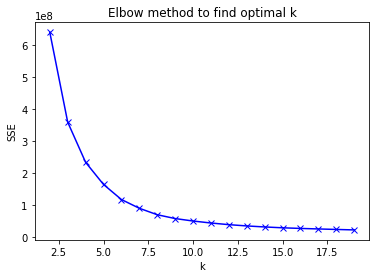

In [46]:
home_vars = ['price_per_sqft', 'bed_bath_ratio', 'age']
e.elbow_plot(X_train_scaled, cluster_vars = home_vars) 

In [47]:
#def run_kmeans(k, cluster_vars, cluster_col_name):
    # create kmeans object
    #kmeans = KMeans(n_clusters = k, random_state = 13)
    #kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    #train_clusters = \
        #pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              #columns=[cluster_col_name],
                              #index=X_train.index)
    
    #return train_clusters, kmeans

In [105]:
train_clusters, kmeans = e.run_kmeans(X_train, X_train_scaled, k=5, 
                                    cluster_vars = ['price_per_sqft', 'bed_bath_ratio', 'age'], 
                                    cluster_col_name = 'home_cluster')

In [106]:
train_clusters.home_cluster.value_counts()

3    11495
1    11204
0     4488
4      861
2       85
Name: home_cluster, dtype: int64

In [50]:
centroid_col_names = ['centroid_' + i for i in home_vars]
centroid_col_names

centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': 'home_cluster'})

In [51]:
centroids

,home_cluster,centroid_price_per_sqft,centroid_bed_bath_ratio,centroid_age
0,0,455.192580,1.588358,58.772849
1,1,99.404676,1.679673,54.905754
2,2,2040.855749,1.389869,69.564706
3,3,267.242681,1.589279,50.856832
4,4,870.456807,1.463032,65.448316


In [52]:
# concatenate cluster id
X_train = pd.concat([X_train, train_clusters], axis=1)

# join on clusterid to get centroids
X_train = X_train.merge(centroids, how='left', on='home_cluster').\
                set_index(X_train.index)

In [53]:
# concatenate cluster id
X_train_scaled = pd.concat([X_train_scaled, train_clusters], 
                           axis=1)

# join on clusterid to get centroids
X_train_scaled = X_train_scaled.merge(centroids, how='left', on='home_cluster').\
                set_index(X_train.index)

## Building quality type id and bed bath ratio clusters (n_clusters = 4)

In [54]:
# scale
scaler = StandardScaler()
# cloumns to scale
cols = ['buildingqualitytypeid', 'bed_bath_ratio']
# Creating a train scaled copy and an original copy
train_scaled = train.copy()
# Fit and transform the data The "fit" part applies to the feature extractor itself: it determines what 
# features it will base future transformations on. The "transform" part is what takes the data and returns
# some transformed data back at you.
train_scaled[cols] = scaler.fit_transform(train[cols])

In [55]:
# Want to make sure to use the scaled trained data
# Choose the features to to cluster on 
X = train_scaled[['buildingqualitytypeid', 'bed_bath_ratio']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=4)
# Create and fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,buildingqualitytypeid,bed_bath_ratio
0,-0.794659,0.571144
1,-0.019492,-0.534941
2,1.602587,-0.420223
3,-1.146454,2.555994


In [57]:
# There are labels_ that were created when running the model. This labels each row of data to a corresponding 
# cluster
kmeans.labels_.shape

(28133,)

In [58]:
# Creating a column cluster from the labels_
train['cluster'] = kmeans.labels_

In [59]:
# Centroid of each cluster
train.groupby('cluster').mean()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,...,structuretaxvaluedollarcnt,home_value,taxamount,logerror,age,taxrate,acres,price_per_sqft,lotsize_per_sqft,bed_bath_ratio
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.566988,3.020924,5.060816,1326.294445,6047.499172,1.539365,3.400936e+07,-1.182084e+08,7886.533343,1.865573,...,97169.889734,311508.227006,3903.749664,0.017962,67.806112,0.013930,0.181050,246.283758,54.624543,1.943562
1,2.511793,3.250142,6.073529,2012.828858,6055.519182,2.402742,3.397035e+07,-1.181631e+08,10610.867576,2.782040,...,199262.466148,528407.063654,6339.922253,0.020150,47.325874,0.012860,0.243592,259.197976,84.416292,1.318374
2,2.618349,3.488459,8.192684,2159.334116,6037.000000,2.618349,3.419171e+07,-1.182527e+08,15120.570618,0.000000,...,227679.847613,576429.027973,7278.925530,0.011740,47.276604,0.013960,0.347121,260.071820,70.650784,1.383216
3,1.022372,3.124240,4.601216,1213.768462,6041.961772,1.009123,3.402036e+07,-1.181959e+08,7347.258036,0.803649,...,81109.197871,275486.689401,3548.911182,0.014435,72.730669,0.014563,0.168670,229.930865,46.182661,3.065450


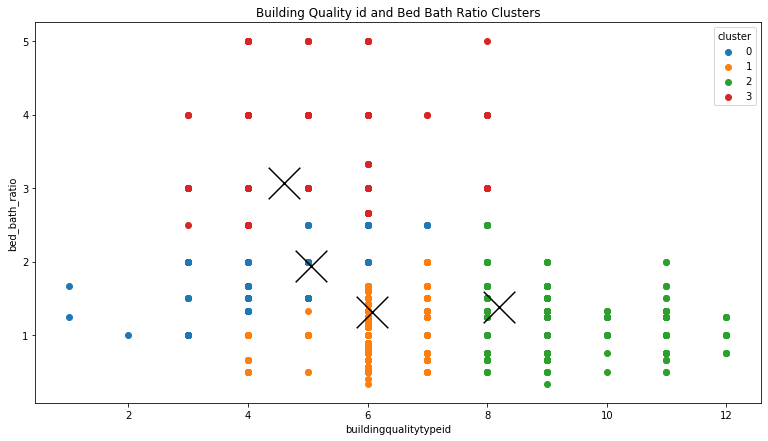

In [60]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.buildingqualitytypeid, subset.bed_bath_ratio, label=cluster)
plt.title("Building Quality id and Bed Bath Ratio Clusters")
ax.legend(title='cluster')
ax.set(ylabel='Bed Bath Ratio', xlabel='Building Quality id')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='bed_bath_ratio', x='buildingqualitytypeid', marker='x', s=1000, ax=ax, c='black')

In [61]:
# sum of squared distances from each point to its cluster center. Used when trying to figure out how many
# Clusters we want to use via the elbow method
kmeans.inertia_

13774.065785168019

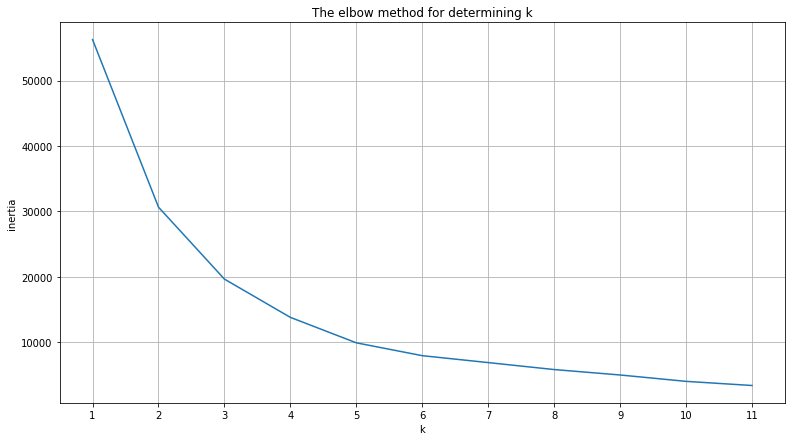

In [62]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()
# So at 4 my kmeans shows the inertia calculated above. Should use k =5 based off the graph

## Building quality type id and bed bath ratio clusters (n_clusters = 5)

In [63]:
# Choose the features to to cluster on 
X = train_scaled[['buildingqualitytypeid', 'bed_bath_ratio']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=5)
# Create and fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,buildingqualitytypeid,bed_bath_ratio
0,0.012574,-0.527425
1,-1.192350,2.574146
2,1.603195,-0.428373
3,-0.142596,0.733510
4,-1.614620,0.250054


In [65]:
# Creating a column cluster from the labels_
train['cluster'] = kmeans.labels_

In [66]:
# Centroid of each cluster
train.groupby('cluster').mean()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,...,structuretaxvaluedollarcnt,home_value,taxamount,logerror,age,taxrate,acres,price_per_sqft,lotsize_per_sqft,bed_bath_ratio
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.526285,3.276267,6.115421,2027.408458,6056.006635,2.414364,3.396780e+07,-1.181611e+08,10661.341597,2.855268,...,201228.997120,532148.335691,6373.088273,0.020320,46.680642,0.012806,0.244751,258.346131,84.938696,1.322623
1,1.011211,3.104484,4.541256,1207.050224,6041.073543,1.010762,3.402197e+07,-1.181930e+08,7341.672197,0.657848,...,80495.902691,271597.817489,3512.469359,0.016248,73.055605,0.014623,0.168542,228.438861,45.241032,3.075710
2,2.620900,3.482224,8.193479,2159.046160,6037.000000,2.620900,3.419198e+07,-1.182527e+08,15131.602632,0.000000,...,227749.392850,576876.085052,7285.172078,0.011699,47.213318,0.013963,0.347374,260.297173,70.749506,1.378609
3,1.676508,3.414609,5.912700,1477.574701,6055.346653,1.622296,3.399001e+07,-1.182106e+08,8396.826164,3.251718,...,108572.202469,344239.885976,4210.026340,0.017126,62.937898,0.013479,0.192765,243.370160,58.553182,2.035336
4,1.474432,2.475063,3.989583,1161.944444,6037.000000,1.474432,3.403983e+07,-1.182110e+08,7367.490530,0.000000,...,86968.719855,282389.618687,3687.846790,0.017178,74.152146,0.014569,0.169134,255.464523,51.303963,1.762074


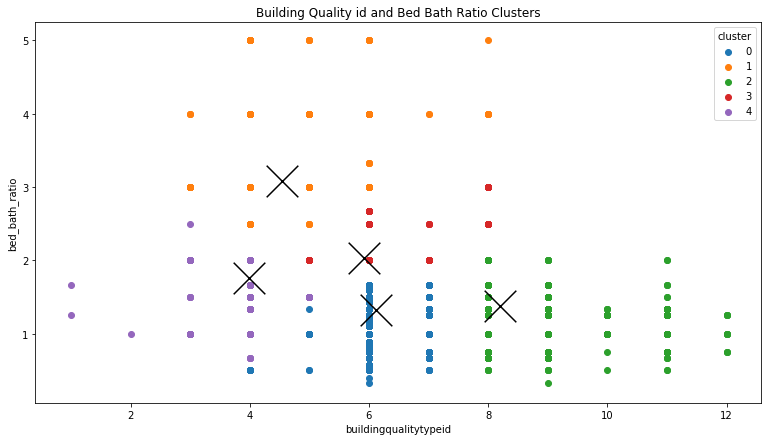

In [67]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.buildingqualitytypeid, subset.bed_bath_ratio, label=cluster)
plt.title("Building Quality id and Bed Bath Ratio Clusters")
ax.legend(title='cluster')
ax.set(ylabel='Bed Bath Ratio', xlabel='Building Quality id')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='bed_bath_ratio', x='buildingqualitytypeid', marker='x', s=1000, ax=ax, c='black')

In [68]:
# sum of squared distances from each point to its cluster center. Used when trying to figure out how many
# Clusters we want to use via the elbow method
kmeans.inertia_

9831.592733692145

## Price per sqft and age clusters (n_clusters = 5)

In [69]:
# scale
scaler = StandardScaler()
# cloumns to scale
cols = ['price_per_sqft', 'age']
# Creating a train scaled copy and an original copy
train_scaled = train.copy()
# Fit and transform the data The "fit" part applies to the feature extractor itself: it determines what 
# features it will base future transformations on. The "transform" part is what takes the data and returns
# some transformed data back at you.
train_scaled[cols] = scaler.fit_transform(train[cols])

In [70]:
# Choose the features to to cluster on 
X = train_scaled[['price_per_sqft', 'age']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=5)
# Create and fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,price_per_sqft,age
0,-0.073356,-1.243845
1,-0.207274,1.665830
2,0.759410,0.374957
3,-0.599015,0.205217
4,4.285357,0.579356


In [72]:
# Creating a column cluster from the labels_
train['cluster'] = kmeans.labels_

# Centroid of each cluster
train.groupby('cluster').mean()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,...,structuretaxvaluedollarcnt,home_value,taxamount,logerror,age,taxrate,acres,price_per_sqft,lotsize_per_sqft,bed_bath_ratio
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.777589,3.557195,6.651532,2339.718123,6056.897591,2.636020,3.406569e+07,-1.181420e+08,14789.326271,2.284904,...,268020.015513,5.746249e+05,7059.108999,0.018925,26.171144,0.013221,0.339516,238.746051,93.557588,1.322647
1,1.569233,2.698282,5.274289,1440.468936,6039.483807,1.566424,3.402161e+07,-1.182399e+08,7145.748513,0.362194,...,96110.283377,3.015513e+05,3843.908014,0.013407,91.814276,0.014068,0.164044,211.486885,49.715531,1.917132
2,1.975090,3.043553,5.987310,1587.040890,6046.901614,1.945794,3.398532e+07,-1.182255e+08,8836.756697,1.844901,...,169884.547705,6.579277e+05,7832.782099,0.008956,62.658154,0.012018,0.202864,410.180227,95.634911,1.689805
3,2.038737,3.270519,5.949461,1649.321352,6047.838198,1.998531,3.402094e+07,-1.181912e+08,9271.255632,2.138100,...,100761.091332,2.159224e+05,2836.619673,0.024515,58.863075,0.014449,0.212839,129.979875,32.014842,1.731814
4,2.238462,2.825641,6.704274,1872.866667,6041.615385,2.203419,3.394065e+07,-1.183080e+08,10267.379487,0.998291,...,464660.811111,2.077380e+06,23916.136085,-0.003242,67.382906,0.011624,0.235707,1136.871880,323.123724,1.435613


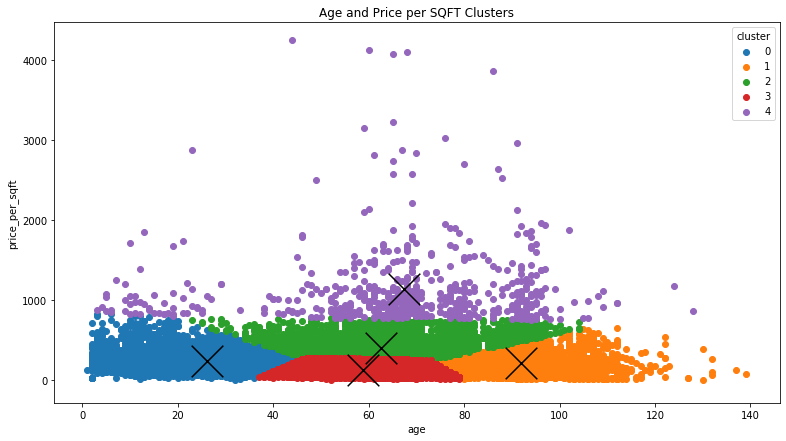

In [73]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.age, subset.price_per_sqft, label=cluster)
plt.title("Age and Price per SQFT Clusters")
ax.legend(title='cluster')
ax.set(ylabel='Price per SQFT', xlabel='Age')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='price_per_sqft', x='age', marker='x', s=1000, ax=ax, c='black')

## Price per sqft and lot size per sqft clusters (n_clusters = 4)

In [74]:
# scale
scaler = StandardScaler()
# cloumns to scale
cols = ['price_per_sqft', 'lotsize_per_sqft']
# Creating a train scaled copy and an original copy
train_scaled = train.copy()
# Fit and transform the data The "fit" part applies to the feature extractor itself: it determines what 
# features it will base future transformations on. The "transform" part is what takes the data and returns
# some transformed data back at you.
train_scaled[cols] = scaler.fit_transform(train[cols])

In [75]:
# Choose the features to to cluster on 
X = train_scaled[['price_per_sqft', 'lotsize_per_sqft']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=4)
# Create and fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# Creating a column cluster from the labels_
train['cluster'] = kmeans.labels_

# Centroid of each cluster
train.groupby('cluster').mean()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,...,structuretaxvaluedollarcnt,home_value,taxamount,logerror,age,taxrate,acres,price_per_sqft,lotsize_per_sqft,bed_bath_ratio
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.220815,3.237539,6.030965,1842.207236,6052.071866,2.143898,3.397646e+07,-1.181984e+08,8489.943699,2.199619,...,196296.681239,5.784315e+05,6932.405272,0.013203,53.230585,0.012128,0.194902,322.660569,82.520004,1.600626
1,2.479531,3.106183,6.460981,2051.287846,6048.337313,2.334328,3.386398e+07,-1.181387e+08,6164.418763,1.529638,...,319955.026013,1.158781e+06,13613.361791,0.012197,51.575693,0.011775,0.141516,577.621064,224.725458,1.378051
2,2.575829,2.909953,6.876777,2136.104265,6046.744076,2.483412,3.383918e+07,-1.182392e+08,5296.118483,1.895735,...,585721.699052,2.628635e+06,29629.812891,-0.006078,55.270142,0.011325,0.121582,1372.957299,624.469320,1.270612
3,2.098155,3.247722,6.084821,1738.247055,6046.716572,2.064079,3.409696e+07,-1.181964e+08,13174.603674,1.692644,...,115280.959701,2.096306e+05,2863.026944,0.022921,55.572487,0.014961,0.302447,118.676344,26.903699,1.686362


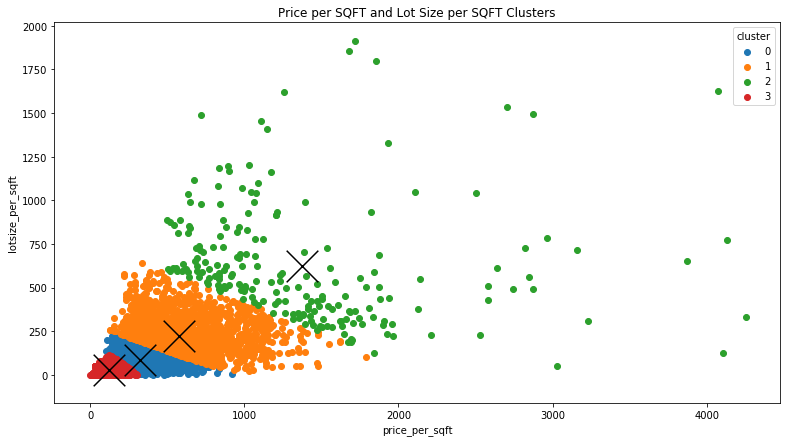

In [77]:
ig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in train.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.price_per_sqft, subset.lotsize_per_sqft, label=cluster)
plt.title("Price per SQFT and Lot Size per SQFT Clusters")
ax.legend(title='cluster')
ax.set(ylabel='Lot Size per SQFT', xlabel='Price per SQFT')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
train.groupby('cluster').mean().plot.scatter(y='lotsize_per_sqft', x='price_per_sqft', marker='x', s=1000, ax=ax, c='black')

- Cluster 0 shows small lot and low ppsqft
- Cluster 1 shows small lot and mid ppsqft
- Cluster 2 shows mid size lot and quite a range in ppsqft ranging from ~ 200 to 1800
- Cluster 3 shows larger lots for the most part and high ppsqft. 

### Going to run a Correlation Test
- Ho: There is no linear relationship between price per sqft and lot size per sqft. 
- Ha: There is a linear relationship between price per sqft and lot size per sqft. 
- Alpha = .05

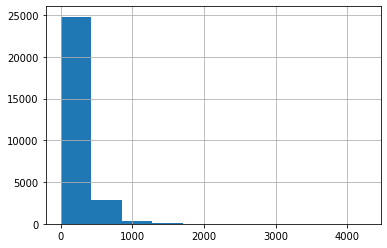

In [78]:
train.price_per_sqft.hist()

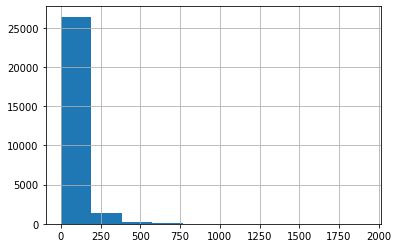

In [79]:
train.lotsize_per_sqft.hist()

In [80]:
# Variances are not the same so going to rn a 
print(train.price_per_sqft.var())
print(train.lotsize_per_sqft.var())

42638.721364296965
7455.873890005031


In [81]:
r, p = stats.pearsonr(train.price_per_sqft, train.lotsize_per_sqft)
print('r =', r)
print('p =', p)

r = 0.656079267016721
p = 0.0


### Reject the null, there is a linear relationship between price_per_sqft and lot_size_per_sqft

     k           sse
0    2  7.869912e+08
1    3  4.753316e+08
2    4  3.454001e+08
3    5  2.694281e+08
4    6  2.195064e+08
5    7  1.895450e+08
6    8  1.643012e+08
7    9  1.407405e+08
8   10  1.210038e+08
9   11  1.089848e+08
10  12  9.880111e+07
11  13  9.137445e+07
12  14  8.451319e+07
13  15  7.800875e+07
14  16  7.322685e+07
15  17  6.859279e+07
16  18  6.493238e+07
17  19  6.139229e+07


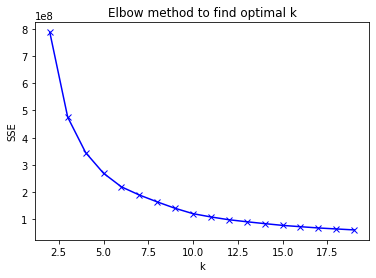

In [82]:
size_vars = ['price_per_sqft', 'lotsize_per_sqft']
e.elbow_plot(X_train_scaled, cluster_vars = size_vars)

In [83]:
train_clusters, kmeans = run_kmeans(k=4, 
                                    cluster_vars = ['price_per_sqft', 
                                                    'lotsize_per_sqft'], 
                                    cluster_col_name = 'size_cluster')

In [84]:
train_clusters.size_cluster.value_counts()

0    13836
1    12261
2     1889
3      147
Name: size_cluster, dtype: int64

In [85]:
centroid_col_names = ['centroid_' + i for i in size_vars]
centroid_col_names

centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': 'size_cluster'})

In [86]:
centroids

,size_cluster,centroid_price_per_sqft,centroid_lotsize_per_sqft
0,0,118.846791,30.343277
1,1,322.282698,92.242189
2,2,681.057952,207.418676
3,3,1723.684659,500.842396


In [87]:
# concatenate cluster id
X_train = pd.concat([X_train, train_clusters], axis=1)

#join on clusterid to get centroids
X_train = X_train.merge(centroids, how='left', on='size_cluster').\
                set_index(X_train.index)


In [88]:
# concatenate cluster id
X_train_scaled = pd.concat([X_train_scaled, train_clusters], 
                           axis=1)

# join on clusterid to get centroids
X_train_scaled = X_train_scaled.merge(centroids, how='left', on='size_cluster').\
                set_index(X_train.index)

### Repeat on validate and test

In [89]:
def add_to_train(cluster_col_name):
    # concatenate cluster id
    X_train2 = pd.concat([X_train, train_clusters], axis=1)

    # join on clusterid to get centroids
    X_train2 = X_train2.merge(centroids, how='left', 
                            on=cluster_col_name).\
                        set_index(X_train.index)
    
    # concatenate cluster id
    X_train_scaled2 = pd.concat([X_train_scaled, train_clusters], 
                               axis=1)

    # join on clusterid to get centroids
    X_train_scaled2 = X_train_scaled2.merge(centroids, how='left', 
                                          on=cluster_col_name).\
                            set_index(X_train.index)
    
    return X_train2, X_train_scaled2

In [90]:
X_train_scaled

,bathroomcnt,bedroomcnt,buildingqualitytypeid,sqft,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,price_per_sqft_scaled,lotsize_per_sqft_scaled,bed_bath_ratio_scaled,home_cluster,centroid_price_per_sqft_x,centroid_bed_bath_ratio,centroid_age,size_cluster,centroid_price_per_sqft_y,centroid_lotsize_per_sqft
1616,1.0,2.0,6.0,906.0,6059.0,1.0,33853594.0,-118013182.0,4536.0,122,...,0.271193,-0.114096,0.670994,3,267.242681,1.589279,50.856832,1,322.282698,92.242189
33322,3.0,4.0,7.0,2548.0,6037.0,3.0,34467094.0,-118202886.0,107586.0,0101,...,-0.424269,-0.785366,-0.508476,1,99.404676,1.679673,54.905754,0,118.846791,30.343277
44530,4.5,5.0,6.0,4733.0,6059.0,4.0,33581133.0,-117690741.0,29600.0,122,...,0.862518,-0.030965,-0.901632,0,455.192580,1.588358,58.772849,1,322.282698,92.242189
32756,3.0,4.0,6.0,2776.0,6059.0,3.0,33700191.0,-117725630.0,6933.0,1,...,0.671124,0.989083,-0.508476,0,455.192580,1.588358,58.772849,1,322.282698,92.242189
67546,3.0,2.0,7.0,2083.0,6037.0,3.0,34044109.0,-118390335.0,6379.0,0100,...,0.534198,0.546407,-1.687945,0,455.192580,1.588358,58.772849,1,322.282698,92.242189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2.0,3.0,6.0,1286.0,6059.0,2.0,33902086.0,-117903131.0,10044.0,122,...,-0.223943,-0.523040,-0.213608,3,267.242681,1.589279,50.856832,0,118.846791,30.343277
51460,1.0,3.0,4.0,1408.0,6037.0,1.0,34098343.0,-117927628.0,5430.0,0100,...,-0.889594,-0.620101,2.440199,1,99.404676,1.679673,54.905754,0,118.846791,30.343277
69123,1.0,2.0,4.0,1266.0,6037.0,1.0,33823405.0,-118125615.0,5995.0,0100,...,0.776707,0.182255,0.670994,0,455.192580,1.588358,58.772849,1,322.282698,92.242189
66706,2.0,3.0,6.0,1684.0,6059.0,2.0,33664809.0,-117822654.0,5300.0,122,...,1.003845,0.866123,-0.213608,0,455.192580,1.588358,58.772849,1,322.282698,92.242189


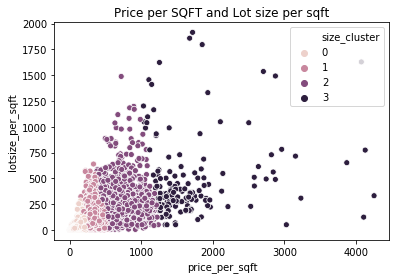

In [91]:
sns.scatterplot(x='price_per_sqft', y='lotsize_per_sqft', hue='size_cluster', data=X_train)
plt.title("Price per SQFT and Lot size per sqft")
plt.show()

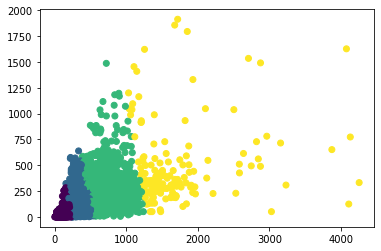

In [92]:
plt.scatter(X_train.price_per_sqft, X_train.lotsize_per_sqft, c=X_train.size_cluster)
plt.show()

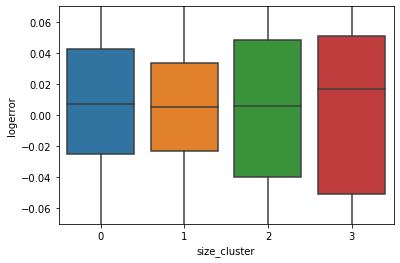

In [93]:
sns.boxplot(X_train.size_cluster, y_train.logerror)
plt.ylim(-.07,.07)
plt.show()

In [94]:
dummy_df = pd.get_dummies(X_train_scaled,
                           columns=['size_cluster','county','binned_bed_bath_ratio'], 
                           drop_first=True)

In [95]:
X_train.groupby(['size_cluster'])['bed_bath_ratio', 
                                 'age', 
                                  'buildingqualitytypeid'].agg(['mean', 'median', 
                                               'std', 'min', 'max'])

bed_bath_ratio                                        age         \
                       mean median       std       min  max       mean median   
size_cluster                                                                    
0                  1.668903   1.50  0.568849  0.400000  5.0  54.534331   57.0   
1                  1.591703   1.50  0.551601  0.500000  5.0  52.350216   55.0   
2                  1.472872   1.50  0.579697  0.333333  5.0  63.194283   66.0   
3                  1.408973   1.25  0.619385  0.500000  4.0  67.496599   69.0   

                                    buildingqualitytypeid                   \
                    std  min    max                  mean median       std   
size_cluster                                                                 
0             21.684542  1.0  139.0              6.100896    6.0  1.317507   
1             22.816293  2.0  132.0              6.027975    6.0  1.203428   
2             24.517459  2.0  128.0              6.507147    6.0  1.693418   
3             22.006342  5.0  102.0              6.598639    6.0  1.694713   

                         
              min   max  
size_cluster             
0             1.0  12.0  
1             3.0  12.0  
2             3.0  12.0  
3             4.0  12.0

In [96]:
X_train_scaled.head().T

,1616,33322,44530,32756,67546
bathroomcnt,1,3,4.5,3,3
bedroomcnt,2,4,5,4,2
buildingqualitytypeid,6,7,6,6,7
sqft,906,2548,4733,2776,2083
fips,6059,6037,6059,6059,6037
fullbathcnt,1,3,4,3,3
latitude,3.38536e+07,3.44671e+07,3.35811e+07,3.37002e+07,3.40441e+07
longitude,-1.18013e+08,-1.18203e+08,-1.17691e+08,-1.17726e+08,-1.1839e+08
lotsizesquarefeet,4536,107586,29600,6933,6379
propertycountylandusecode,122,0101,122,1,0100


In [97]:
X_train_scaled.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'sqft', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'home_value', 'taxamount',
       'transactiondate', 'heatingorsystemdesc', 'county', 'age', 'taxrate',
       'acres', 'price_per_sqft', 'lotsize_per_sqft', 'bed_bath_ratio',
       'binned_price_per_sqft', 'binned_bed_bath_ratio', 'bathroomcnt_scaled',
       'bedroomcnt_scaled', 'buildingqualitytypeid_scaled', 'sqft_scaled',
       'fips_scaled', 'fullbathcnt_scaled', 'latitude_scaled',
       'longitude_scaled', 'lotsizesquarefeet_scaled', 'roomcnt_scaled',
       'unitcnt_scaled', 'yearbuilt_scaled',
       'structuretaxvaluedollarcnt_scaled', 'home_value_scaled',
       'taxamount_scaled', 'age_scaled', 'taxrate_scaled', 'acres_scaled',
       'price_per_sqft_scaled', 'lotsize_per_sqft_scaled',
       'bed_bath_ratio_scaled', 'home

In [99]:
X_train_scaled = X_train_scaled.drop(columns = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'sqft', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'home_value', 'taxamount',
       'transactiondate', 'heatingorsystemdesc', 'county', 'age', 'taxrate',
       'acres', 'price_per_sqft', 'lotsize_per_sqft', 'bed_bath_ratio',
       'binned_price_per_sqft', 'binned_bed_bath_ratio', 'centroid_price_per_sqft_x',
       'centroid_bed_bath_ratio', 'centroid_age', 'size_cluster',
       'centroid_price_per_sqft_y', 'centroid_lotsize_per_sqft'])

In [102]:
X_validate_scaled.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'sqft', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'home_value', 'taxamount',
       'transactiondate', 'heatingorsystemdesc', 'county', 'age', 'taxrate',
       'acres', 'price_per_sqft', 'lotsize_per_sqft', 'bed_bath_ratio',
       'binned_price_per_sqft', 'binned_bed_bath_ratio', 'bathroomcnt_scaled',
       'bedroomcnt_scaled', 'buildingqualitytypeid_scaled', 'sqft_scaled',
       'fips_scaled', 'fullbathcnt_scaled', 'latitude_scaled',
       'longitude_scaled', 'lotsizesquarefeet_scaled', 'roomcnt_scaled',
       'unitcnt_scaled', 'yearbuilt_scaled',
       'structuretaxvaluedollarcnt_scaled', 'home_value_scaled',
       'taxamount_scaled', 'age_scaled', 'taxrate_scaled', 'acres_scaled',
       'price_per_sqft_scaled', 'lotsize_per_sqft_scaled',
       'bed_bath_ratio_scaled'],
    

In [ ]:
X_train_scaled = X_train_scaled.drop(columns = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'sqft', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'home_value', 'taxamount', 'age',
       'taxrate', 'acres', 'bed_bath_ratio', 'centroid_price_per_sqft_x',
       'centroid_bed_bath_ratio', 'centroid_age', 'centroid_price_per_sqft_y',
       'centroid_lotsize_per_sqft', 'size_cluster_1', 'size_cluster_2',
       'size_cluster_3', 'county_Orange County', 'county_Ventura County',
       'binned_bed_bath_ratio_medium', 'binned_bed_bath_ratio_large'])

In [ ]:
X_train_scaled = X_train_scaled.drop(columns = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'sqft', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'home_value', 'taxamount', 'age',
       'taxrate', 'acres', 'bed_bath_ratio', 'centroid_price_per_sqft_x',
       'centroid_bed_bath_ratio', 'centroid_age', 'centroid_price_per_sqft_y',
       'centroid_lotsize_per_sqft', 'size_cluster_1', 'size_cluster_2',
       'size_cluster_3', 'county_Orange County', 'county_Ventura County',
       'binned_bed_bath_ratio_medium', 'binned_bed_bath_ratio_large'])

In [ ]:
X_train_scaled

In [ ]:
#from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train.logerror)
y_hat = lm.predict(X_train_scaled)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train.logerror, y_hat)**(1/2)

In [ ]:
y_hat = np.full(28133, np.mean(y_train.logerror))
y_hat

import math
math.sqrt(mean_squared_error(y_train.logerror, y_hat))

## Performing Validate

In [ ]:
# scale
scaler = StandardScaler()
# cloumns to scale
cols = ['price_per_sqft', 'lotsize_per_sqft']
# Creating a train scaled copy and an original copy
validate_scaled = validate.copy()
# Fit and transform the data The "fit" part applies to the feature extractor itself: it determines what 
# features it will base future transformations on. The "transform" part is what takes the data and returns
# some transformed data back at you.
validate_scaled[cols] = scaler.fit_transform(validate[cols])

# Choose the features to to cluster on 
X = validate_scaled[['price_per_sqft', 'lotsize_per_sqft']]
# Choose the KMeans clusters
kmeans = KMeans(n_clusters=4)
# Create and fit the model
kmeans.fit(X)

pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# Creating a column cluster from the labels_
validate['cluster'] = kmeans.labels_

# Centroid of each cluster
validate.groupby('cluster').mean()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

# for the column cluster, we can group by the cluster subset
for cluster, subset in validate.groupby('cluster'):
    # Telling it to graph the cluster subset with the corresponding features
    ax.scatter(subset.price_per_sqft, subset.lotsize_per_sqft, label=cluster)
plt.title("Price per SQFT and Lot Size per SQFT Clusters")
ax.legend(title='cluster')
ax.set(ylabel='Lot Size per SQFT', xlabel='Price per SQFT')
# Making the X to lay on top of the scatter plot to see the mean() AKA centroid of each cluster
validate.groupby('cluster').mean().plot.scatter(y='lotsize_per_sqft', x='price_per_sqft', marker='x', s=1000, ax=ax, c='black')

In [ ]:
def run_kmeans(k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_validate_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_validate_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans

In [103]:
validate_clusters, kmeans = run_kmeans(k=4, 
                                    cluster_vars = ['price_per_sqft', 
                                                    'lotsize_per_sqft'], 
                                    cluster_col_name = 'size_cluster')

KeyError: "None of [Index(['price_per_sqft', 'lotsize_per_sqft'], dtype='object')] are in the [columns]"

In [ ]:
X_train_scaled = dummy_df.drop(columns=['binned_price_per_sqft','price_per_sqft','lotsize_per_sqft','transactiondate','heatingorsystemdesc'])